



# **Loan Default Prediction Classification Machine Learning**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Read the dataset**

In [ ]:
hm=pd.read_csv("/content/drive/MyDrive/ML_project/ML_classification/hmeq.csv")

In [ ]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [ ]:
# Display first five rows
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [ ]:
# Display last 5 rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

### **Understand the shape of the dataset**

In [ ]:
# Check the shape of the data
data.shape

(5960, 13)

**Insights There are 5960 records and 13 columns in the dataset.**

### **Check the data types of the columns**

In [ ]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights:  
There are 2 categorical variables: JOB and REASON.  
The rest of the variables are numerical.  
There are null values in all the variables except BAD and LOAN.**  

### **Check for missing values**

In [ ]:
# Analyse missing values 
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
# Check the percentage of missing values in the each column.
(data.isnull().sum())/(data.shape[0])*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights  
DEBTINC (21.2%) and DEROG(11.9%) have the most missing values in the dataset.   
Othere missing values are following variables: DELINQ (9.7%), MORTDUE(8.7%), YOJ(8.6%) and NINQ(8.5%).**

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [ ]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [ ]:
cols

['REASON', 'JOB', 'BAD']

In [ ]:
# Changing the data type of object type column to category. 

for i in cols:
    data[i] = data[i].astype('category')

In [ ]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [ ]:
# Analyze the summary statistics for numerical variables

data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Insights  

-Loan amount has max of 89900 and minimum 1100. The mean is slightly higher than the 50% median, the data could be slightly left skewed.  
-The mean of mortgage due is 73760, max 399550 and min 2063.  
-Value varies from 8000 to 855909, which is a big range, it is the largest standard deviation.  
-Year of present job has min 0, this borrower could be just starting his/her career or recently changed job; the max of YOJ is 41, that can assume the woker who is working the longest term.   
-DOROG and DELINQ both have 0 at 0%, 25%, 50% and 75% quantile, and a max  10 and 15. This indicated only specific people have derogatory record or delinquent credit line as our borrower.   
-CLAGE has the mean of 179.76 month, that is almost 15 years of age of credit line. Min is 85.8 (7+ year) and max of 1168 months (97+ years). The max value may error since that can assume the person is more than 100 years old that is very unusual. No one starts the credit line from 0 years old. And we don't think someone still pays mortage at his/her age 118 or more. We are going to take care of this error entry later on.    
-NINQ and CLNO both have means which are pretty close to 50%(median).   Their max values are very high which is more than 2 time of the 3rd quatile(75%). That means there are outliers between the 3rd quatile and max.  
-DEBTINC is a good indicator of borrower's abitliy to pay off their debt. We can see the mean of debt to income ratio is 33%, with a standard deviation of 8.6%. 75% quantile value lands at 39% which is consistent with the common understanding.   

**

In [ ]:
# Check summary for categorical data.

data.describe(include='category').T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights -BAD is a binary variable. The frequency of BAD with 0 is 4771 out of 5960 data points, which indicated approximately 80% of the borrowers did not default the loan. The frequency of BAD with 1 is 20% of the borrowers defaulted the loan.  
-There are 2 main reasons people requested loan. 3928 out of 5708 borrowers that we have data for loan request reason, are debt consolidation, which consisted approximately 68.8%. The other reason is for HomeImprovement which consisted 31.2%.  
-There are 6 type of JOB variable. Other are the highest frequent job title.**

**Let's look at the unique values in all the categorical variables**

In [ ]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*40)

Unique values in BAD are :
0    4771
1    1189
Name: BAD, dtype: int64
****************************************
Unique values in REASON are :
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
****************************************
Unique values in JOB are :
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
****************************************


**Insights:  As anticipated BAD only has two unique values as default or not default borrowers. ~20% of the borrowers in this dataset has defaulted on the loan.  
There are two main REASONs for home equity loan - home improvement and debt consolidation. Approximately 66% of borrowers requested loan for debt consolidation; 30% of borrowers requested loan for Home Improvement; the remaining 4% are the missing value.  
In the JOB category, there are 6 job types in the dataset, besides Other(40%), ProfExe is the most common job type, consist about 21% of the whole dataset, followed by Office(16%), Manager(13%), self-employed(3%) and Sales(2%), the remaining 4% are the missing value.  **

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

**Insights**  

Absolute count of unique value doesn't give a straight forward idea of the distribution of the values. Converting them into percentage will be a much better way to see the unique value distribution. We can achieve that pass attribute of normalized = True in the value_counts() function.  

In [ ]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts(normalize = True))
    print('*'*40)

Unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

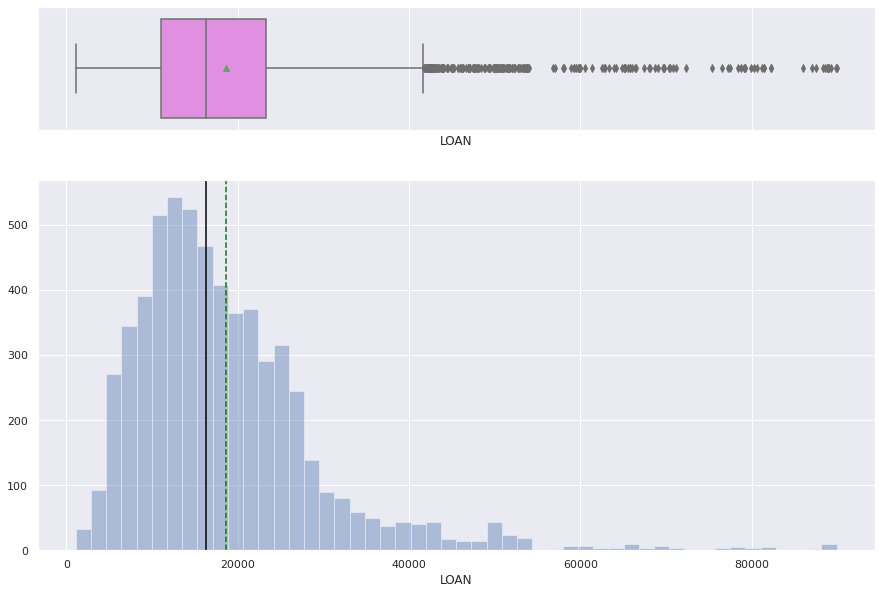

In [ ]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights:**  
In the boxplot, there are a lot of outliers in the dataset.  
From the histogram we can see the distribution are slightly right skewed.  
Majority of the LOAN amounts are under 40,000, and the mean and median both just under 20,000.  

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

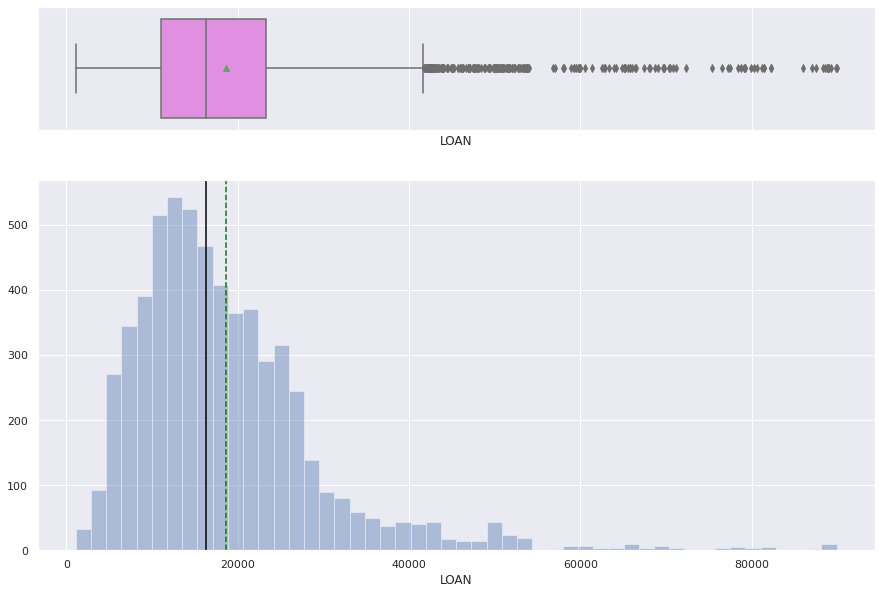

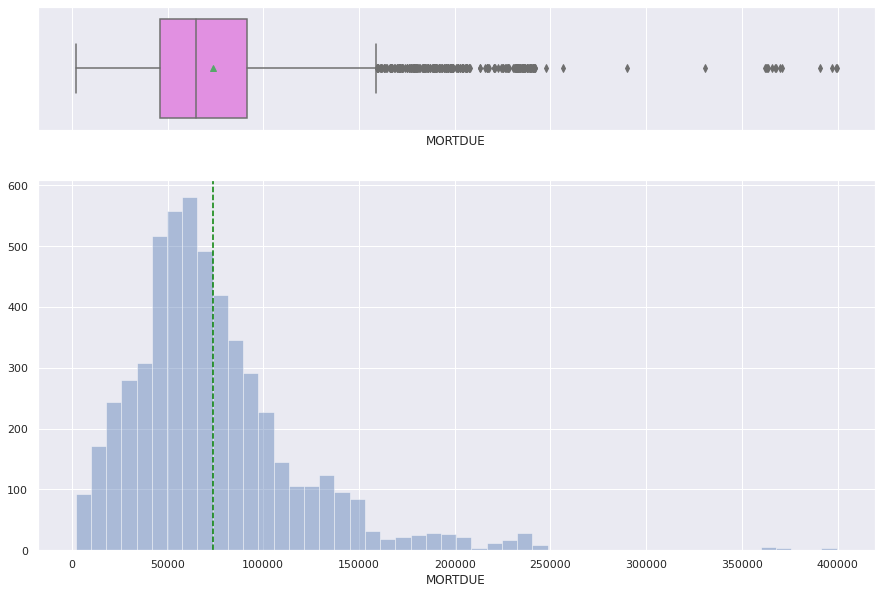

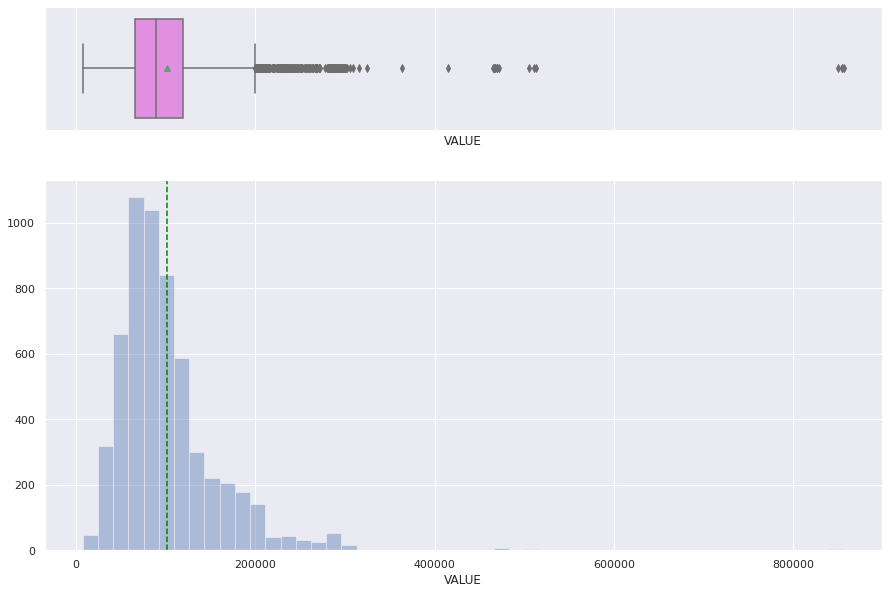

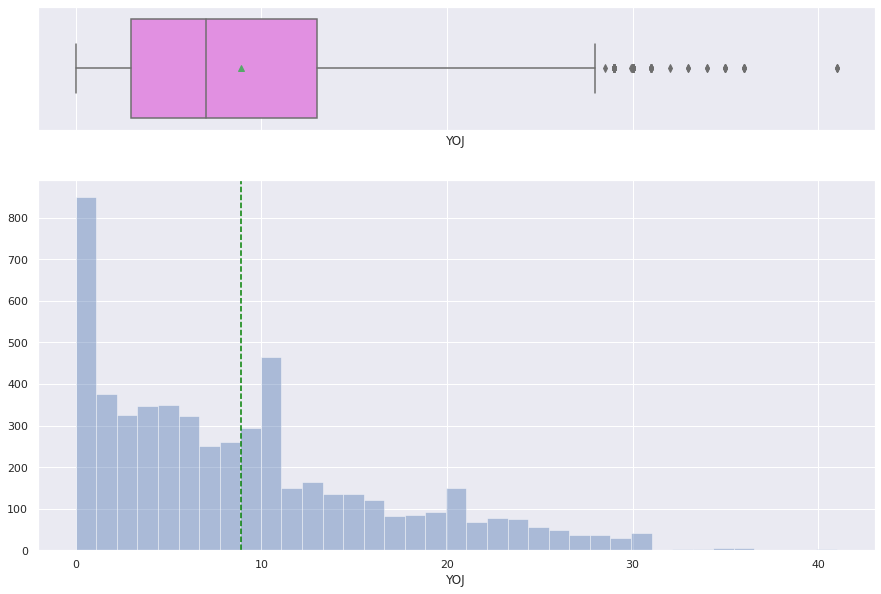

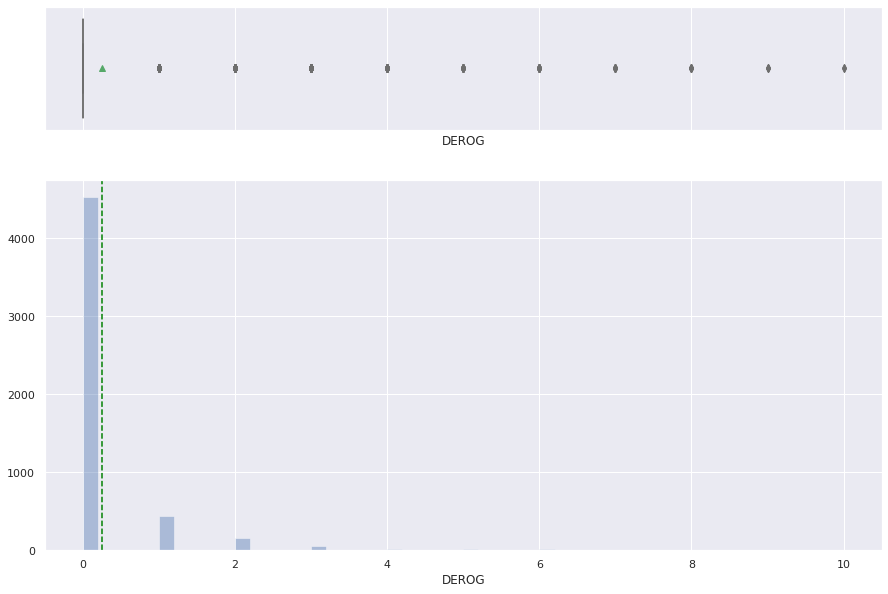

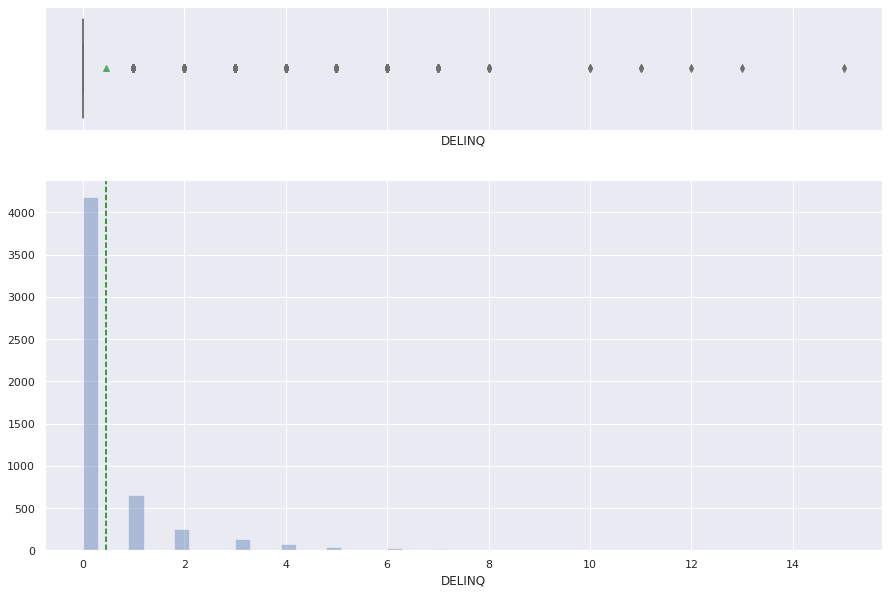

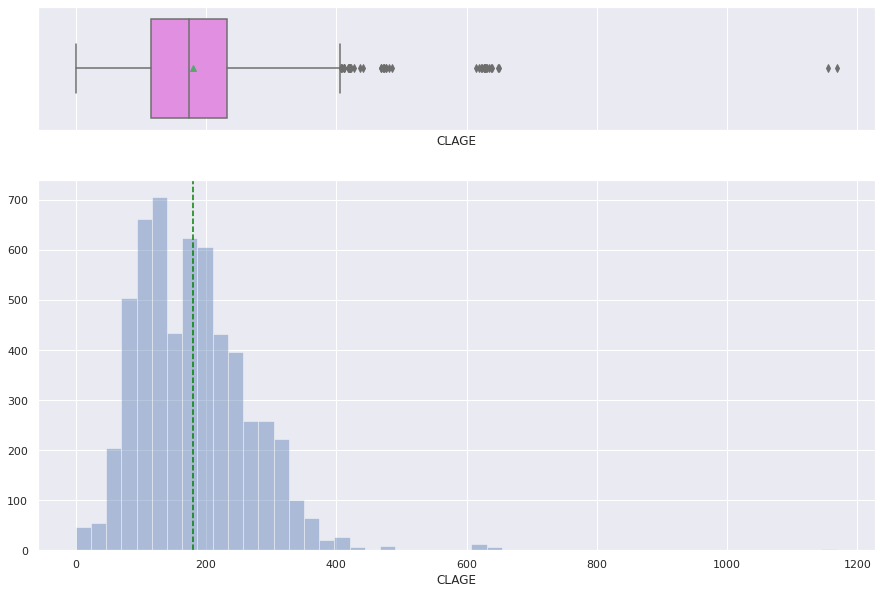

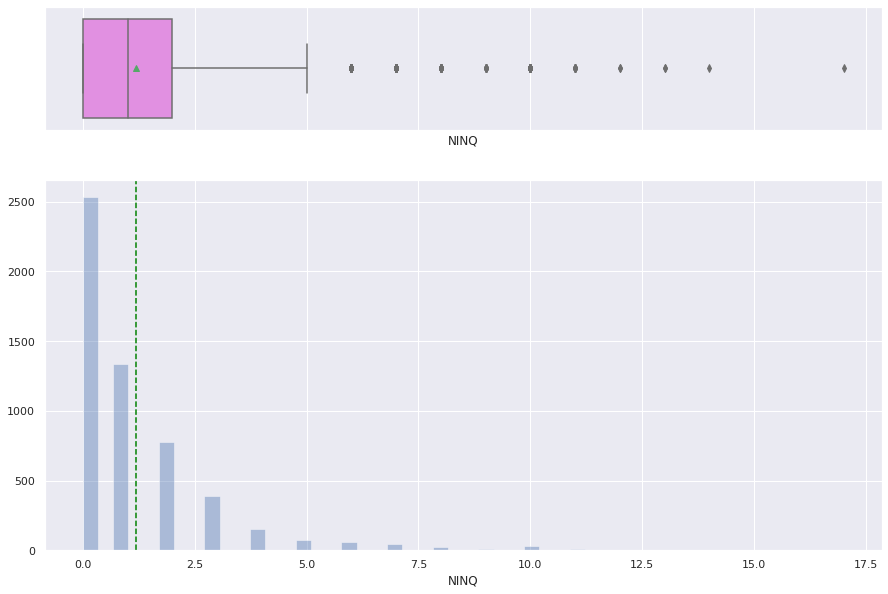

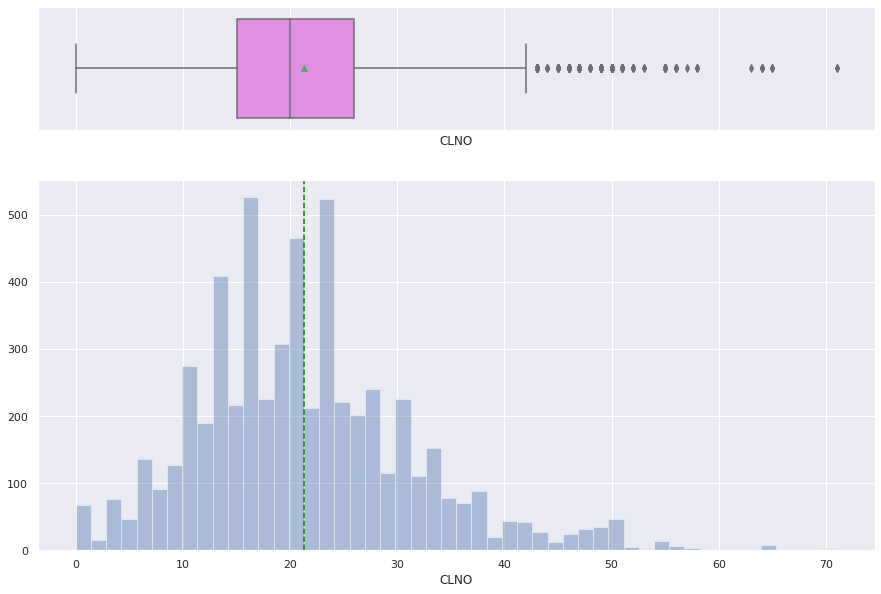

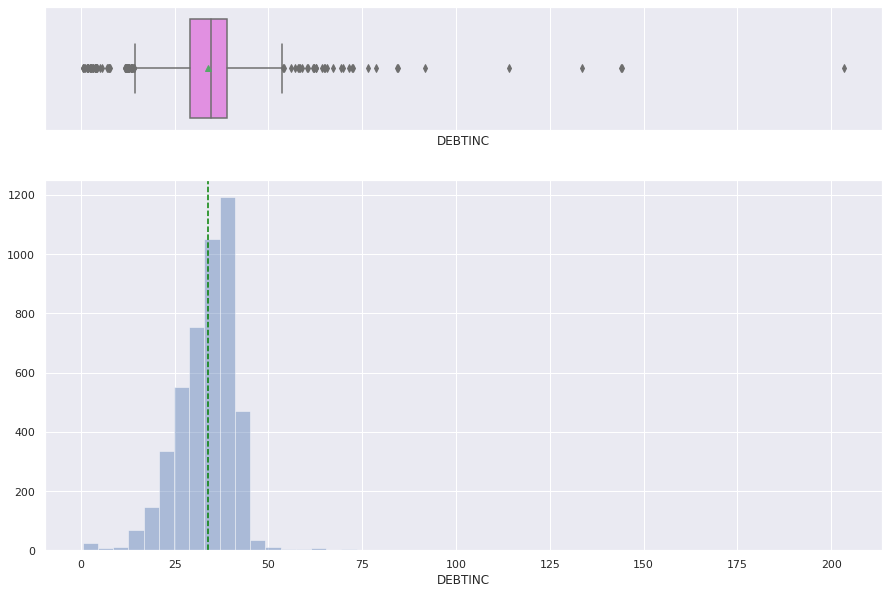

In [ ]:
cols_num= data.select_dtypes(['number']).columns

for i in cols_num: 
  histogram_boxplot(data[i])

**Insights**  
-All the numerical variables have a more of less right skewed distribution, with one exception of DEBTINC ratio, which is slightly left skewed.  
-All the numerical variables have outliers.  
-Majority of the MORTDUE are under 150k, most people have about 50k mortgage due at the exiting time.  
-Majority of the current value of the property is under 200k, most poeple has a current home value ~100k.  
-There are two peaks in YOJ distribution, 0-1 year and just over 10 year.   We can only speculate that perhaps when people first started their job, who may be just entering job market, has accumulated some debt before they are employed; or 10 years down the same job they take out a loan to make some life improvement because they have gained confidence in their earning ability.  
-Mass majority of the borrowers have 0 DEROG and DELINQ which is expected.   People with major derogatory reports or delinquent credit lines are much less likely to be approved of loans to begin with.  
-Majority of borrowers have less than 360 months of CLAGE which is consistent with average working years of average people.  
-Mojority of people have less than 2 NINQ in recent months.  
-Majority of people have less than 40 existing credit lines. Compared to all other numerical variables, CLNO resembles normal distribution the most, even though it is not a typical normal distribution.  
-Majority of the DEBTINC ratio is ~35%, which is a commonly understood a standard to have healthy debt to income ratio.  

### **2. Univariate Analysis - Categorical Data**

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

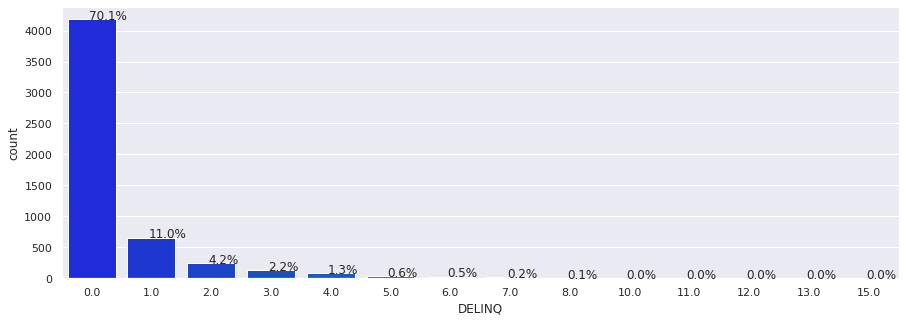

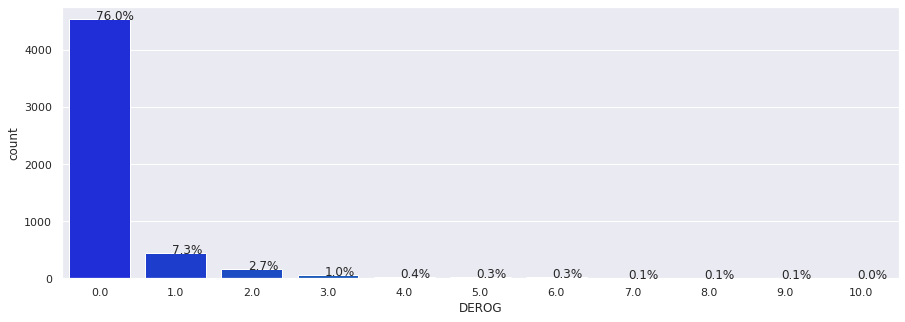

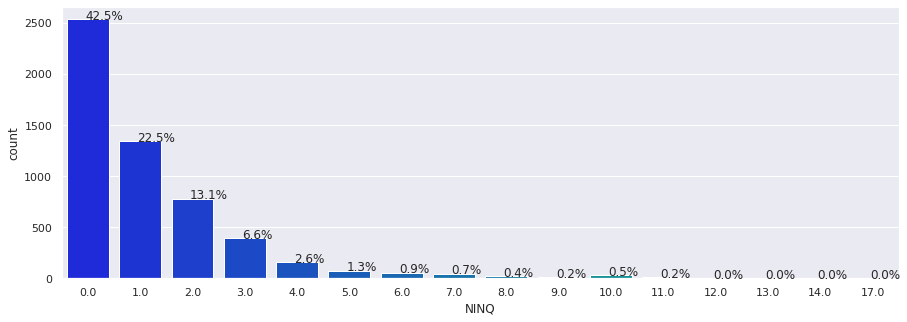

In [ ]:
#Build barplot for DELINQ
plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

#Build barplot for DEROG
plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

#Build barplot for NINQ
plt.figure(figsize=(15,5))
ax = sns.countplot(data["NINQ"],palette='winter')
perc_on_bar(ax,data["NINQ"])

**Insights**  
Similar to our previous findings about the distribution, majority of the borrowers have 0 DEROG (76%), DELINQ (70%) and NINQ (43%).  



#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

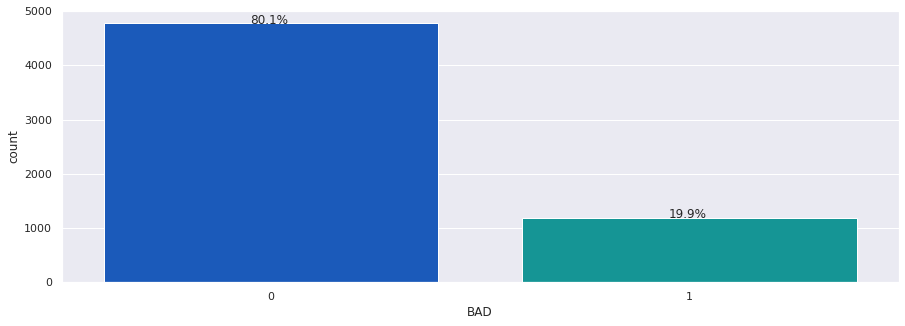

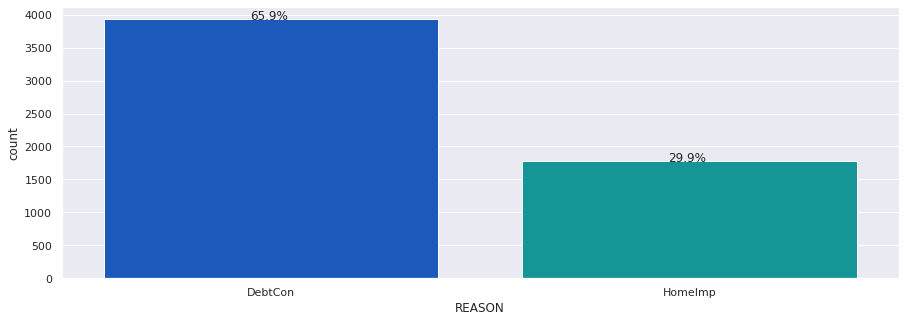

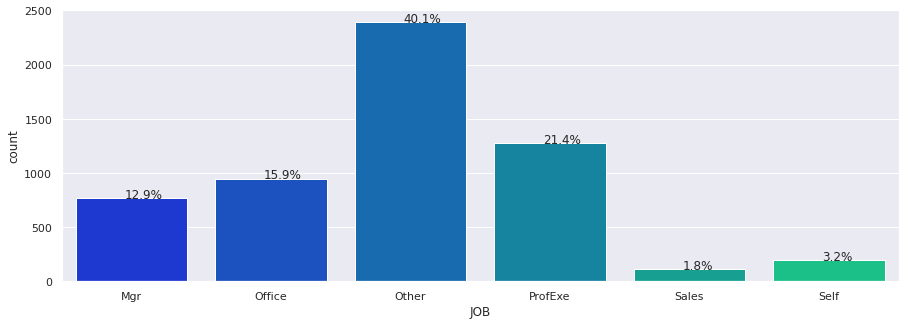

In [ ]:
for i in cols_cat: 
  plt.figure(figsize=(15,5))
  ax = sns.countplot(data[i],palette='winter')
  perc_on_bar(ax,data[i])

**Insights**   
Visualization is a good way to convey the data distribution of categorical variables. Also, even though the missing values are not deliberately displayed in the barplot, but the % calculation are based on the total record count, versus non-null count. This is a more accurate depiction of the data distribution.  

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

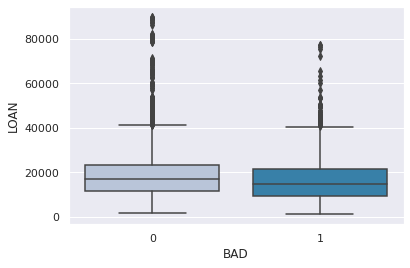

In [ ]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights**  
-By plotting the BAD and LOAN amount we can see that both the default and not default group, majority of the loan amount are very similar, both group have outliers.  
-We can infer that the loan amount is not an obvious differenciating factor for default prediction. Poeple with larger loan amount doesn't necessarily default more than people with less loan amount.  

<AxesSubplot:xlabel='BAD', ylabel='VALUE'>

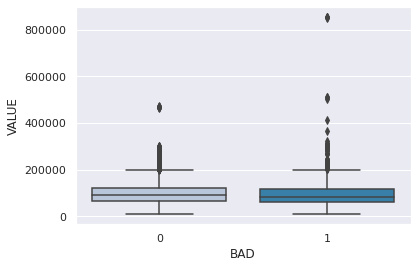

In [ ]:
sns.boxplot(data["BAD"],data['VALUE'],palette="PuBu")

<AxesSubplot:xlabel='BAD', ylabel='DELINQ'>

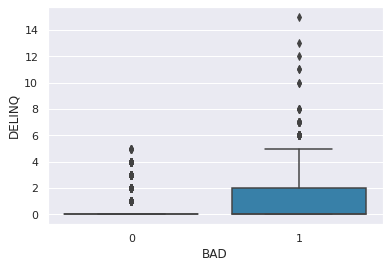

In [ ]:
sns.boxplot(data["BAD"],data['DELINQ'],palette="PuBu")

**Insight**  

With a few exceptions, most of the borrowers has no delinquent credit line did not default on the home equity loan.  
most of the defaulted borrower has 1-2 delinquent credit lines.  

<AxesSubplot:xlabel='BAD', ylabel='DEROG'>

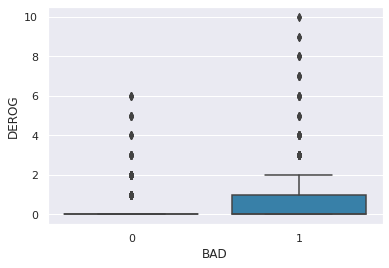

In [ ]:
sns.boxplot(data["BAD"],data['DEROG'],palette="PuBu")

**Insight**  

Similar to our findings in DELINQ section, most of the borrowers who did not default the loan have no DEROG report.  
Within the group of default borrowers, most of them have ~1 DEROG report on record.  
Both charts are showing there are outliers, people with DEROG or DELINQ record could still pay off their home equity loan.  

####**Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

<AxesSubplot:xlabel='JOB', ylabel='YOJ'>

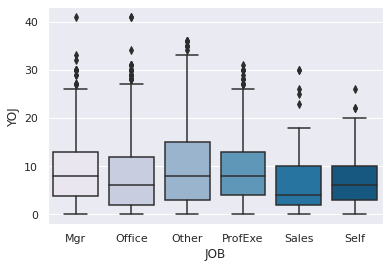

In [ ]:
sns.boxplot(data["JOB"],data['YOJ'],palette="PuBu")

**Insight**   

One's career longevity could be a indicator of his/her ability to generate consistent income.  
Besides Other, we can see that Sales and Self-employeed job seems to have a tighter range of YOJ. The median value of YOJ are the lowest at Sales. This could be Sales is a job type with less entry barrier. Manager, Office and ProfExe seem to have the longer YOJ range, meaning those jobs are perhaps more stable than Sales or Self-employeed job.

<AxesSubplot:xlabel='JOB', ylabel='DEBTINC'>

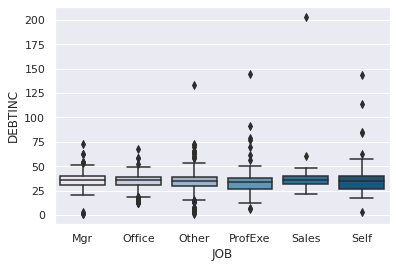

In [ ]:
sns.boxplot(data["JOB"],data['DEBTINC'],palette="PuBu")

**Insight**  

JOB type and the DEBTINC ratio could also tell us something about maybe some job type (personality) and their spending style.  
We can see some very high debt to income ratio spenders are in the Sales, ProfExe, and Self-employed categroy. This is not surprising, some of the very successful individuals in Sales and ProfExe may be less risk adverse, and willing to utlize borrowed money to invest/spend.  

<AxesSubplot:xlabel='REASON', ylabel='NINQ'>

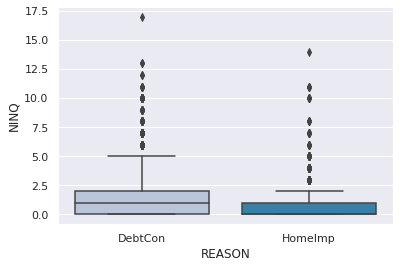

In [ ]:
sns.boxplot(data["REASON"],data['NINQ'],palette="PuBu")

**Insight**   

Borrowers who are seeking debt consolidation may have more recent credit inquiries, suggesting they may or may not already have cashflow challenge, is in the process to finding ways to borrow money.  
Borrowers who is seeking loan for home improvement generally have less recent credit inquiry.  

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

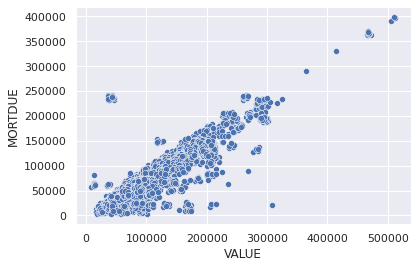

In [ ]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights:**  
Consistent with our common understanding the current value of property wil have a positive linear correlation with MORTDUE.  

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

<AxesSubplot:xlabel='YOJ', ylabel='CLAGE'>

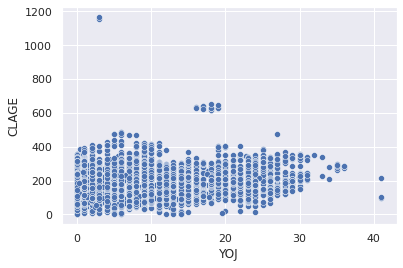

In [ ]:
sns.scatterplot(data["YOJ"],data['CLAGE'],palette="PuBu")

**Insights**  
There is no linear relationship between YOJ and CLAGE. People with more years of experience does not necessarily have higher age of credit history.  

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


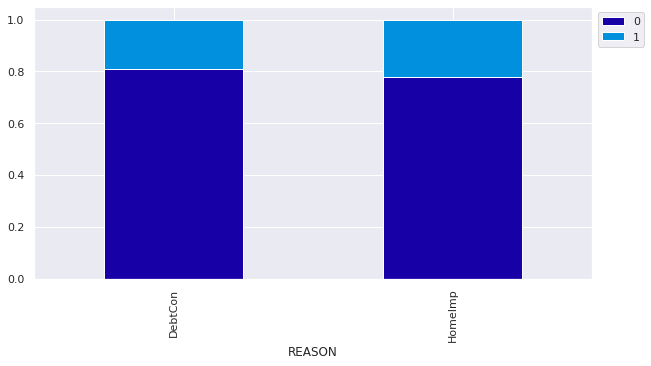

In [ ]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights**  
There is similar percentage of borrowers default their loan regardless of their reason for borrowing.  

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


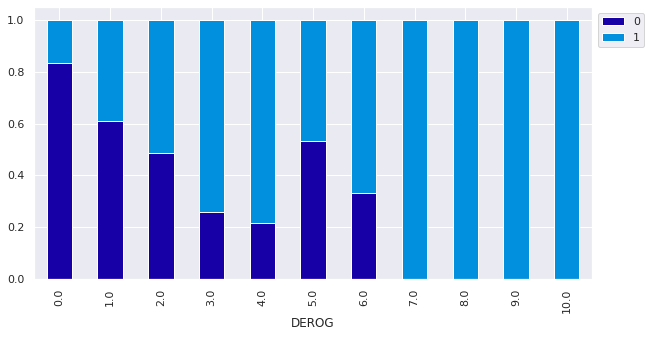

In [ ]:
stacked_plot(data['DEROG'])

**Insights**  
The percentage of default increased from 20% to ~80% as the number of derogatory reports increase from 0-4.  
In our dataset, ~50% of borrowers with 5 derogatory reports have defaulted the loan.  
All of the borrowers who have more than 6 derogatory reports on their record, defaulted on the home equity loan.  

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


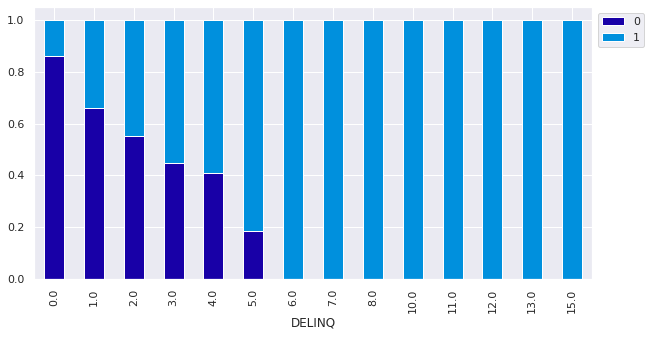

In [ ]:
stacked_plot(data['DELINQ'])

**Insight**  

The percentage of default increased from ~16% to ~81% as the number of delinquent credit line increase from 0-5.  

All of the borrowers who have more than 5 delinquent credit lines, defaulted on the home equity loan.  

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

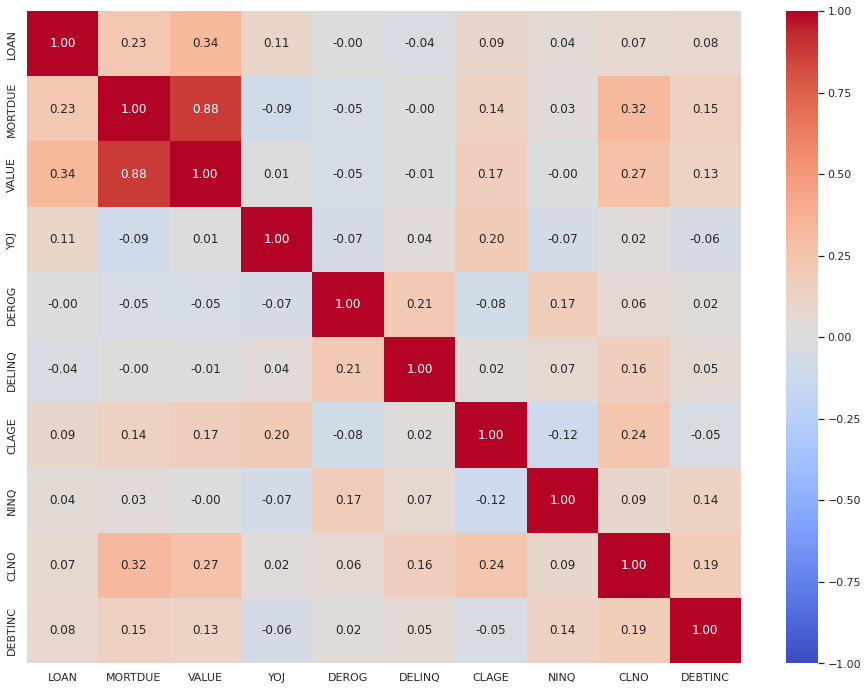

In [ ]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot = True);

**Insight**  

From the correlation matrix we can see:  

VALUE and MORTDUE are highly positively correlated, which are expected.  
LOAN amount is positively correlated to VALUE, MORTDUE and YOJ; negatively correlated to DELINQ.  
CLNO is positively correlated to MORTDUE, VALUE and CLAGE.  
DEROG and DELINQ, NINQ are positively correlated.  
CLAGE and YOJ is also positively correlated.  
CLAGE and NINQ is negatively correlated.   

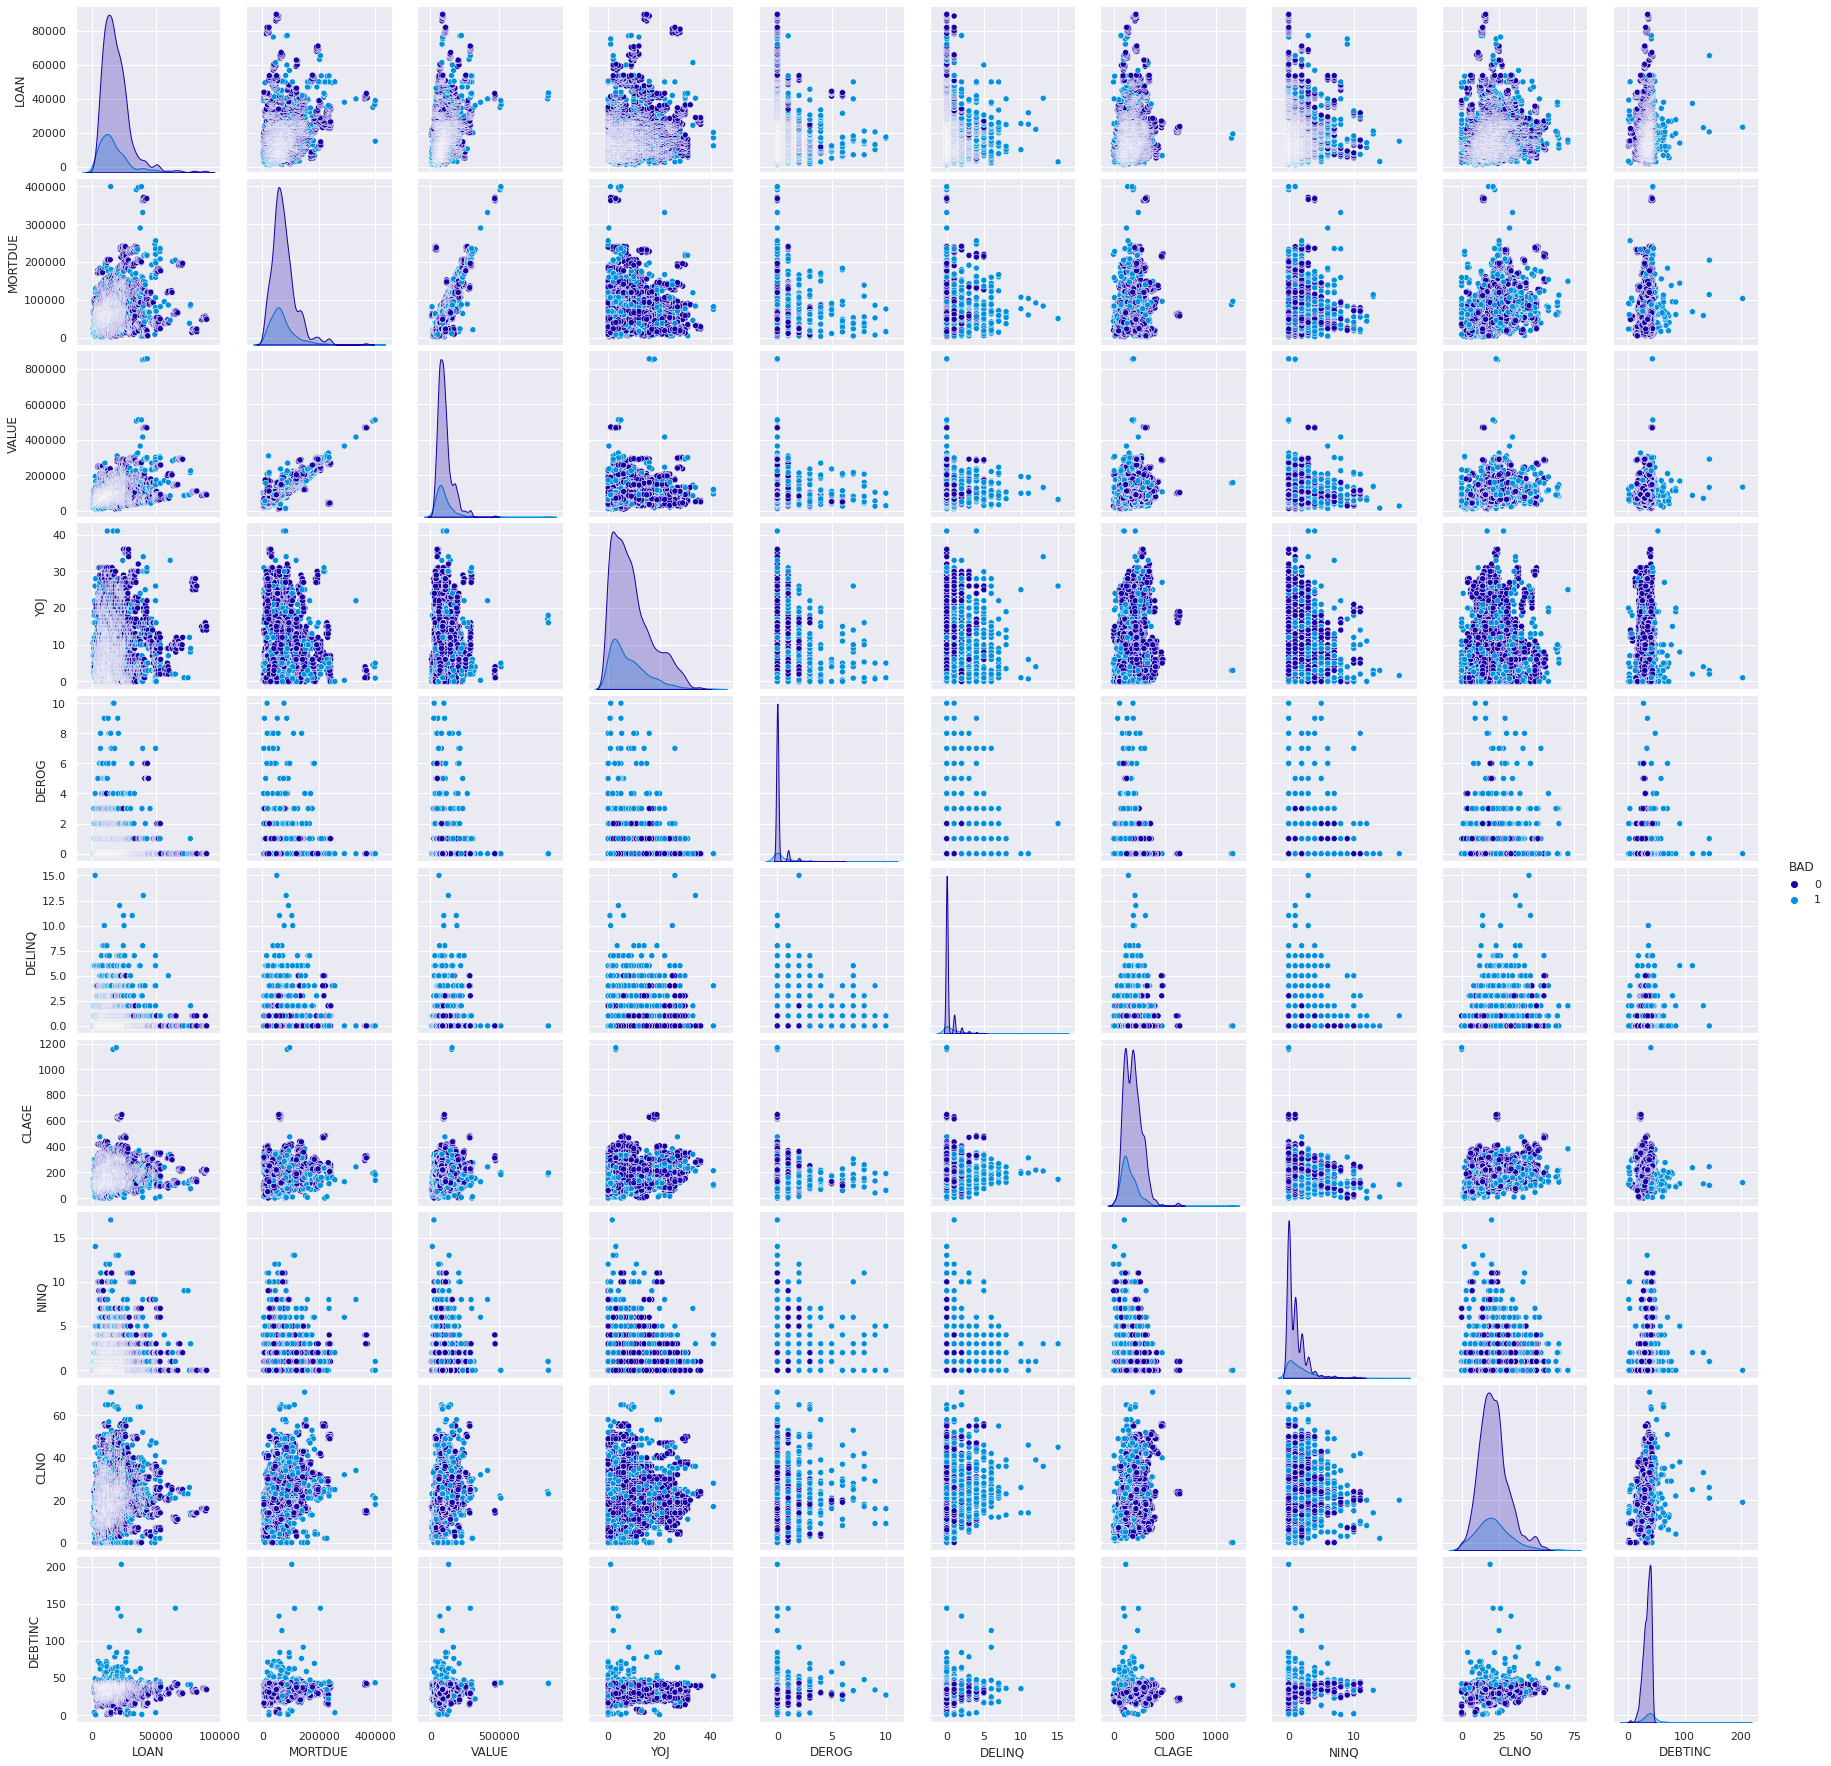

In [ ]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data, hue = "BAD")

**Insight**  

Except VALUE and MORTDUE show a positive linear relationship, no other variables are showing linear relationship.  
The DEBTINC seem to show a threshold distirbution, The non-default borrowers appears to cluster below 50% threshould.  

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

**Insight**  

There are many missing values and outliers in our dataset. We can treat missing value and outliers by either dropping the record, or fill in missing value or replace outlier with what we deem as the most appropriate value. Some of the most common value to use for filling in missing values are the mean and the mode. We can also replace the outlier value by replacing them with more reasonable values.  

Besides dropping and replacing outliers, we also need to take the underlying distribution into consideration, the particular impact of such outlier, is it s true reflection of the reality or it is an error.  

#### Treating Outliers

In [ ]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1= df[col].quantile(0.25) # 25th quantile
    Q3= df[col].quantile(0.75)  # 75th quantile
    IQR= Q3-Q1   # IQR Range
    Lower_Whisker = Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [ ]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

numerical_col = list(filter(lambda x: x not in ['DEROG', 'DELINQ'], numerical_col)) #excluding DEROG and DELINQ in the outlier treatment, as the treatment removed everything other than 0 in our dataset.

df = treat_outliers_all(df_raw,numerical_col)

df.describe().T

count          mean           std          min           25%  \
LOAN     5960.0  18051.895973   9252.565294  1100.000000  11100.000000   
MORTDUE  5442.0  71566.093752  37203.654400  2063.000000  46276.000000   
VALUE    5848.0  98538.057633  45070.800236  8000.000000  66075.500000   
YOJ      5445.0      8.873159      7.430914     0.000000      3.000000   
DEROG    5252.0      0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0      0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0    178.635811     80.495471     0.000000    115.116702   
NINQ     5450.0      1.093394      1.372692     0.000000      0.000000   
CLNO     5738.0     21.032851      9.420239     0.000000     15.000000   
DEBTINC  4693.0     33.681973      7.135236    14.345367     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   41600.000000  
MORTDUE  65019.000000   91488.000000  159306.000000  
VALUE    89235.500000  119824.250000  200447.375000  
YOJ          7.000000      13.000000      28.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278     406.230642  
NINQ         1.000000       2.000000       5.000000  
CLNO        20.000000      26.000000      42.500000  
DEBTINC     34.818262      39.003141      53.797805

In [ ]:
data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Insight**  

Comparing the description of df and our orignal data, we can see that a lot of the outliers have been tamed.  

However, the DEROG and DELINQ values was removed in the initial outlier treatment. This may have a negative impact on our model. After careful consideration, I decided to keep the outliers in these two variables.  

#### Adding new columns in the dataset for each column which has missing values 

In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

#### Filling missing values in numerical columns with median and mode in categorical variables

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.

df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.

for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(value=mode)

In [ ]:
df.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

In [ ]:
df.describe().T

count          mean           std          min           25%  \
LOAN     5960.0  18051.895973   9252.565294  1100.000000  11100.000000   
MORTDUE  5960.0  70997.067819  35597.710401  2063.000000  48139.000000   
VALUE    5960.0  98363.244470  44663.105774  8000.000000  66489.500000   
YOJ      5960.0      8.711300      7.122031     0.000000      3.000000   
DEROG    5960.0      0.224329      0.798458     0.000000      0.000000   
DELINQ   5960.0      0.405705      1.079256     0.000000      0.000000   
CLAGE    5960.0    178.368680     78.395960     0.000000    117.371430   
NINQ     5960.0      1.085403      1.312898     0.000000      0.000000   
CLNO     5960.0     20.994379      9.245170     0.000000     15.000000   
DEBTINC  5960.0     33.923529      6.348461    14.345367     30.763159   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   41600.000000  
MORTDUE  65019.000000   88200.250000  159306.000000  
VALUE    89235.500000  119004.750000  200447.375000  
YOJ          7.000000      12.000000      28.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     227.143058     406.230642  
NINQ         1.000000       2.000000       5.000000  
CLNO        20.000000      26.000000      42.500000  
DEBTINC     34.818262      37.949892      53.797805

In [ ]:
df.to_csv("/content/drive/MyDrive/ML_project/ML_classification/cleaned_data.csv", index=False)


## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?

**2. Overall solution design** - What is the potential solution design?

**3. Measures of success** - What are the key measures of success?

**Insight**  

Potential techniques to be explored are we can try logistic regression model to decide the most influential variables contributes to determine if a borrower will default on the loan or not. We could also try decision tree and random forest to predict if the borrower will likely to default the loan.

After the EDA analysis, we can start building models and evaluate each model's performance, we can also deploy different ways to tune the models with good potential, then find the best model.

As a bank, the decision makers will want to find the good balance of giving out most amount of loans to good borrowers. Therefore, I believe a good measurement of success could be F-1 score, which balance out the false positive and false negative. If F-1 scores are similar, we would want to choose the model with highest recall, as the false nagative will cost the bank a lot of money; versus false positive will cost the bank the potiential income.

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load cleaned dataset from milestone 1

data=pd.read_csv("/content/drive/MyDrive/ML_project/ML_classification/cleaned_data.csv")


In [ ]:
data.describe().T

count          mean           std          min           25%  \
BAD      5960.0      0.199497      0.399656     0.000000      0.000000   
LOAN     5960.0  18051.895973   9252.565294  1100.000000  11100.000000   
MORTDUE  5960.0  70997.067819  35597.710401  2063.000000  48139.000000   
VALUE    5960.0  98363.244470  44663.105774  8000.000000  66489.500000   
YOJ      5960.0      8.711300      7.122031     0.000000      3.000000   
DEROG    5960.0      0.224329      0.798458     0.000000      0.000000   
DELINQ   5960.0      0.405705      1.079256     0.000000      0.000000   
CLAGE    5960.0    178.368680     78.395960     0.000000    117.371430   
NINQ     5960.0      1.085403      1.312898     0.000000      0.000000   
CLNO     5960.0     20.994379      9.245170     0.000000     15.000000   
DEBTINC  5960.0     33.923529      6.348461    14.345367     30.763159   

                  50%            75%            max  
BAD          0.000000       0.000000       1.000000  
LOAN     16300.000000   23300.000000   41600.000000  
MORTDUE  65019.000000   88200.250000  159306.000000  
VALUE    89235.500000  119004.750000  200447.375000  
YOJ          7.000000      12.000000      28.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     227.143058     406.230642  
NINQ         1.000000       2.000000       5.000000  
CLNO        20.000000      26.000000      42.500000  
DEBTINC     34.818262      37.949892      53.797805

In [ ]:
# Create y(dependent varibale)
y = data['BAD']

# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = data.drop(['BAD'], axis=1, inplace = True)

# Create dummy variables for the categorical variables
X = pd.get_dummies(data,columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(), drop_first = True)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LOAN                         5960 non-null   float64
 1   MORTDUE                      5960 non-null   float64
 2   VALUE                        5960 non-null   float64
 3   YOJ                          5960 non-null   float64
 4   DEROG                        5960 non-null   float64
 5   DELINQ                       5960 non-null   float64
 6   CLAGE                        5960 non-null   float64
 7   NINQ                         5960 non-null   float64
 8   CLNO                         5960 non-null   float64
 9   DEBTINC                      5960 non-null   float64
 10  MORTDUE_missing_values_flag  5960 non-null   bool   
 11  VALUE_missing_values_flag    5960 non-null   bool   
 12  REASON_missing_values_flag   5960 non-null   bool   
 13  JOB_missing_values

### **Splitting the data into 70% train and 30% test set**

In [ ]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [ ]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [ ]:
#scale the feature data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)  #to prevent data leakage, we will only transform but not fit the test data.

In [ ]:
# Defining the Logistic regression model

lr = LogisticRegression(class_weight= {0: .2, 1: .8},random_state =1)

# Fitting the model on the training data 

lr.fit(X_train_std, y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.86      0.91      3355
           1       0.59      0.82      0.69       817

    accuracy                           0.85      4172
   macro avg       0.77      0.84      0.80      4172
weighted avg       0.88      0.85      0.86      4172



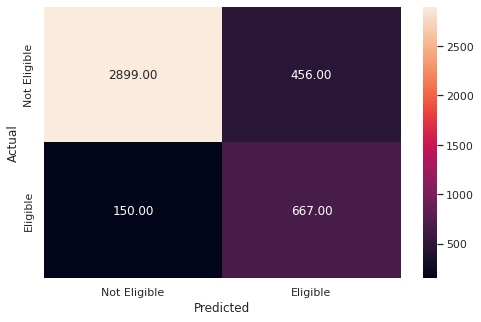

In [ ]:
#Predict for train set
y_train_pred = lr.predict(X_train_std)
#checking the performance on the train dataset
metrics_score(y_train, y_train_pred)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1416
           1       0.63      0.79      0.70       372

    accuracy                           0.86      1788
   macro avg       0.78      0.83      0.80      1788
weighted avg       0.88      0.86      0.86      1788



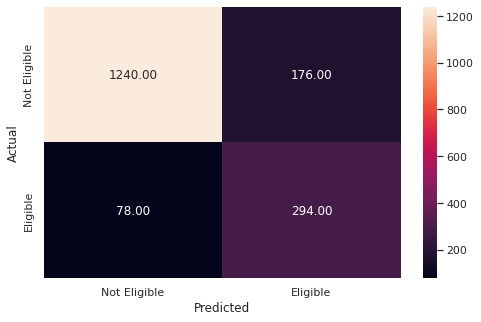

In [ ]:
#Predict for test set
y_test_pred = lr.predict(X_test_std)
#checking the performance on the test dataset
metrics_score(y_test, y_test_pred)

**Observations:**  
Based on the logistic regression, we got 63% precision, 79% recall, 70% F1 score and 86% accuracy for class 1.  
The model performed more or less the same on training and test data, our model is not likely to have overfitting issue.  

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [ ]:
# Printing the coefficients of logistic regression
coef = pd.DataFrame(zip(X_train.columns, np.transpose(lr.coef_.tolist()[0])), columns=['features', 'coef'])

coef.sort_values(by = 'coef', ascending = False)

features      coef
20  DEBTINC_missing_values_flag  1.110801
5                        DELINQ  0.849627
9                       DEBTINC  0.655231
11    VALUE_missing_values_flag  0.593908
19     CLNO_missing_values_flag  0.592954
4                         DEROG  0.450167
17    CLAGE_missing_values_flag  0.251186
7                          NINQ  0.216862
25                    JOB_Sales  0.176934
1                       MORTDUE  0.079169
21               REASON_HomeImp  0.064182
23                    JOB_Other  0.052279
26                     JOB_Self  0.040071
10  MORTDUE_missing_values_flag  0.011320
0                          LOAN  0.004197
12   REASON_missing_values_flag -0.025772
16   DELINQ_missing_values_flag -0.055812
24                  JOB_ProfExe -0.066200
2                         VALUE -0.112629
3                           YOJ -0.118917
18     NINQ_missing_values_flag -0.151775
14      YOJ_missing_values_flag -0.182151
8                          CLNO -0.183490
22                   JOB_Office -0.232678
6                         CLAGE -0.438580
13      JOB_missing_values_flag -0.453483
15    DEROG_missing_values_flag -0.665217

**Insights**  
Based on the logistic regression, we can see that DEBTINC_missing_flag appears to be the most important feature, followed by DELINQ, DEBTINC and Value_missing_flag.  

LOAN amount and REASON_missing_value have negligible impact on the probability if a borrow may default or not.  

JOB_missing_value and DEROG_missing_value negative impact on the probability of default, which is not very easily explainable.  

Overall we can see if an application has a lot of missing value, especially for DEBTINC ratio, according to our model, his/her change of default may be higher.  


In [ ]:
# we can change the threshold of the classifier, in order to do that we need the prediction output to be probability.


lr_mod = LogisticRegression(class_weight= {0: .2, 1: .8},random_state =1)

lr_mod.fit(X_train_std,y_train)


THRESHOLD = 0.50 

y_test_pred_mod = lr_mod.predict_proba(X_test_std)[:,1]

y_test_pred_mod_cl = np.where(y_test_pred_mod>THRESHOLD,1,0)

In [ ]:
#plot precision-recall curve to help find the optimal threshold 
from sklearn.metrics import precision_recall_curve

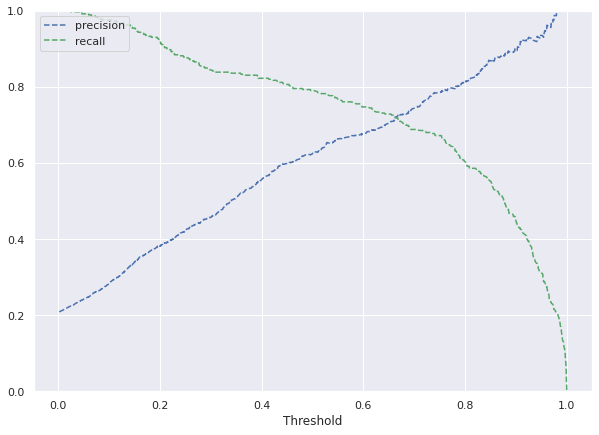

In [ ]:
# Plot values of precisions, recalls, and thresholds
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_test, y_test_pred_mod)

plt.figure(figsize = (10, 7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')

plt.ylim([0, 1])
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1416
           1       0.74      0.69      0.72       372

    accuracy                           0.89      1788
   macro avg       0.83      0.81      0.82      1788
weighted avg       0.88      0.89      0.88      1788



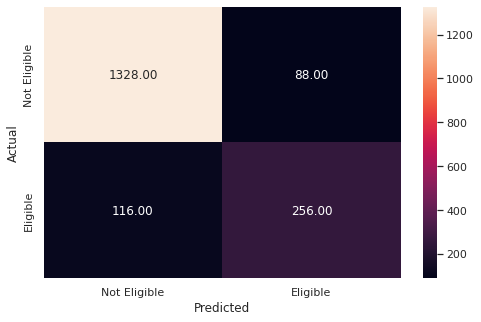

In [ ]:
#if we use 0.70 as the threshold

lr_mod_70 = LogisticRegression(class_weight= {0: .2, 1: .8},random_state =1)

lr_mod_70.fit(X_train_std,y_train)

THRESHOLD = 0.70

y_test_pred_mod_70 = np.where(lr_mod_70.predict_proba(X_test_std)[:,1]>THRESHOLD,1,0)

metrics_score(y_test, y_test_pred_mod_70)

**Insight**  

After tuning the threshold, we got a slightly better model with same F1 score at 70%, but recall has increased from 62% to 80%, with a decrease in precision 62% from 82%. This is a better model given the business problem is loan default. At the same F1 score, we would like to maximize recall to avoid loan defaulters.

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

**Insight**  

We don't necessarily need to treat outliers for decision tree models, tree type models can handle outlier better than logistic/linear regression.  

However in order to compare the model performance we will use the same dataset.  

In [ ]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}

d_tree = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.2, 1: 0.8})

In [ ]:
#fitting Decision tree model

d_tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



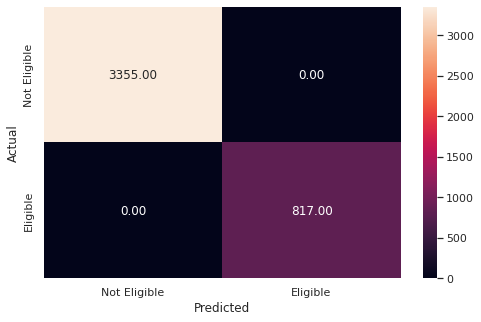

In [ ]:
# Checking performance on the training data

y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1416
           1       0.69      0.62      0.65       372

    accuracy                           0.86      1788
   macro avg       0.80      0.77      0.78      1788
weighted avg       0.86      0.86      0.86      1788



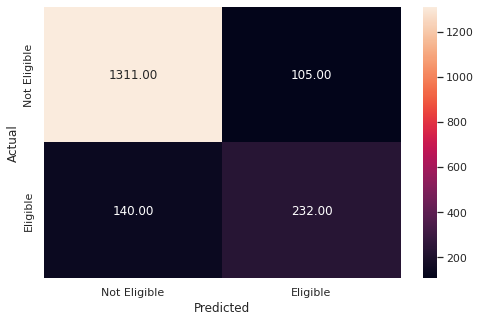

In [ ]:
# Checking performance on the testing data

y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test1)

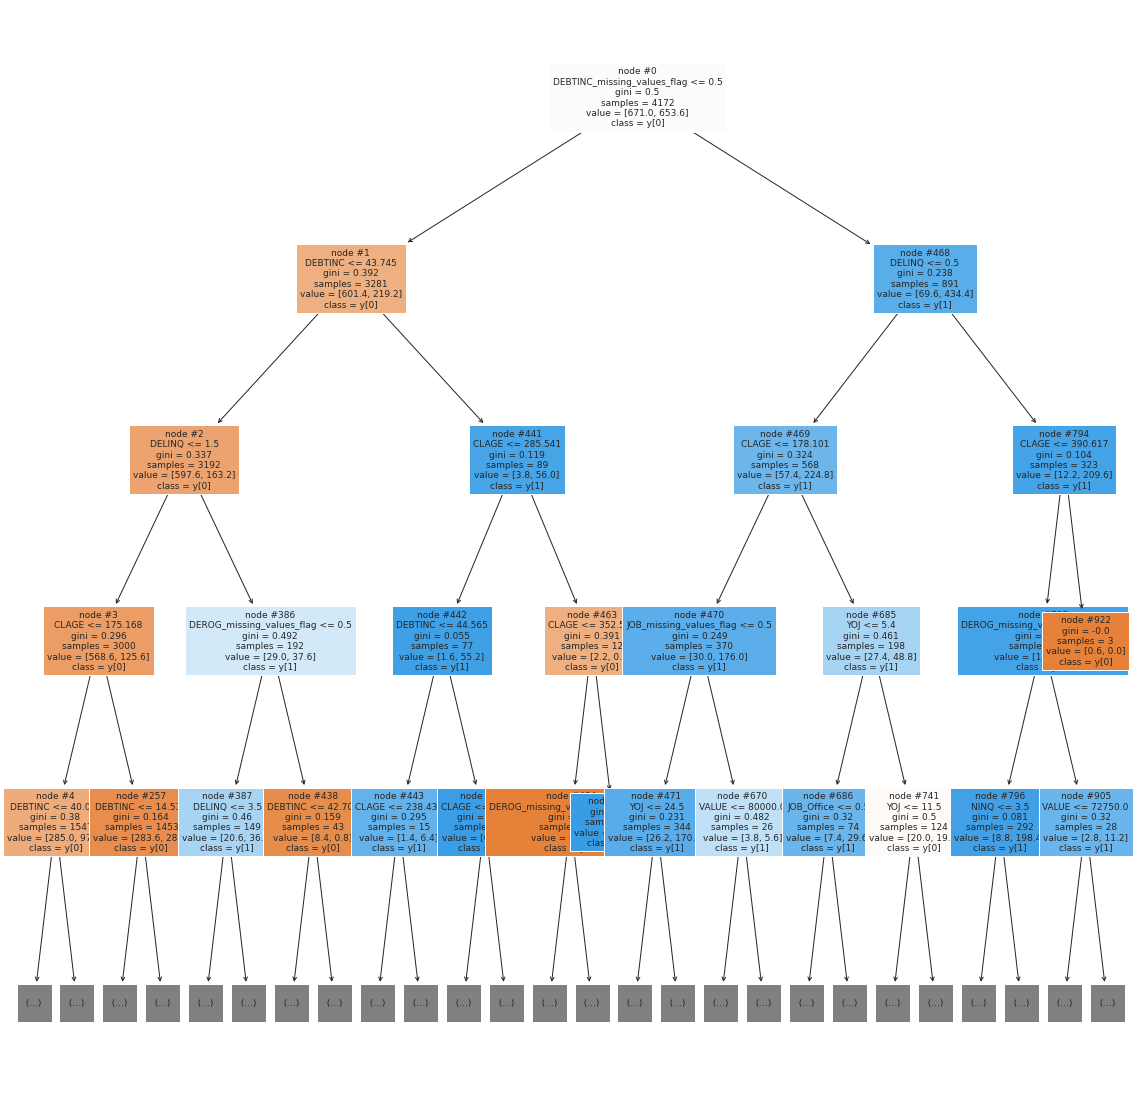

In [ ]:
# Plot the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True, max_depth = 4)

plt.show()

**Insights**   
From this initial version of decision tree, we can see that recall and precision were both 1 for the training dataset, which means, we are very likely having an overfitted model.  
From the test dataset result, we can see that the recall rate is 62%, precision is 69%, F-1 score is 65%. This model can be improved by tuning the parameters.  

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [ ]:
# Choose the type of classifier. 

d_tree_tuned = DecisionTreeClassifier(random_state = 1, class_weight = {0: 0.2, 1: 0.8})


# Grid of parameters to choose from

parameters = {'max_depth': np.arange(3, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(f1_score, pos_label = 1)
                                                           

# Run the grid search

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)


# Fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters

d_tree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=6, min_samples_leaf=10, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3355
           1       0.67      0.79      0.73       817

    accuracy                           0.88      4172
   macro avg       0.81      0.85      0.83      4172
weighted avg       0.89      0.88      0.89      4172



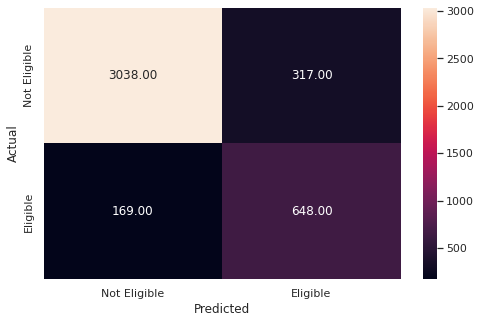

In [ ]:
# Checking performance on the training data based on the tuned model

y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1416
           1       0.67      0.72      0.69       372

    accuracy                           0.87      1788
   macro avg       0.80      0.81      0.80      1788
weighted avg       0.87      0.87      0.87      1788



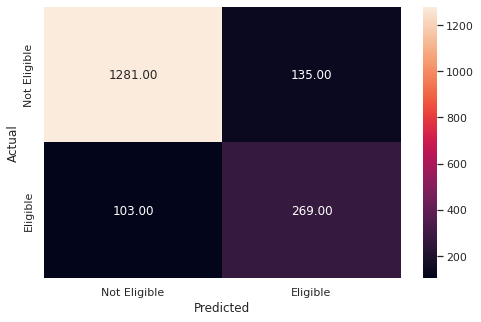

In [ ]:
# Checking performance on the testing data based on the tuned model

y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)

**Insights**  

After tuning the decision tree, the F-1 score for class 1 has improved slightly from 65% to 69%. Recall increased from 62% to 72% however the precision has decreased from 69% to 67%.  
The overfitting issue has reduced signaficantly as the tuned model performances are very similar on the training and testing datasets.  

#### Plotting the Decision Tree

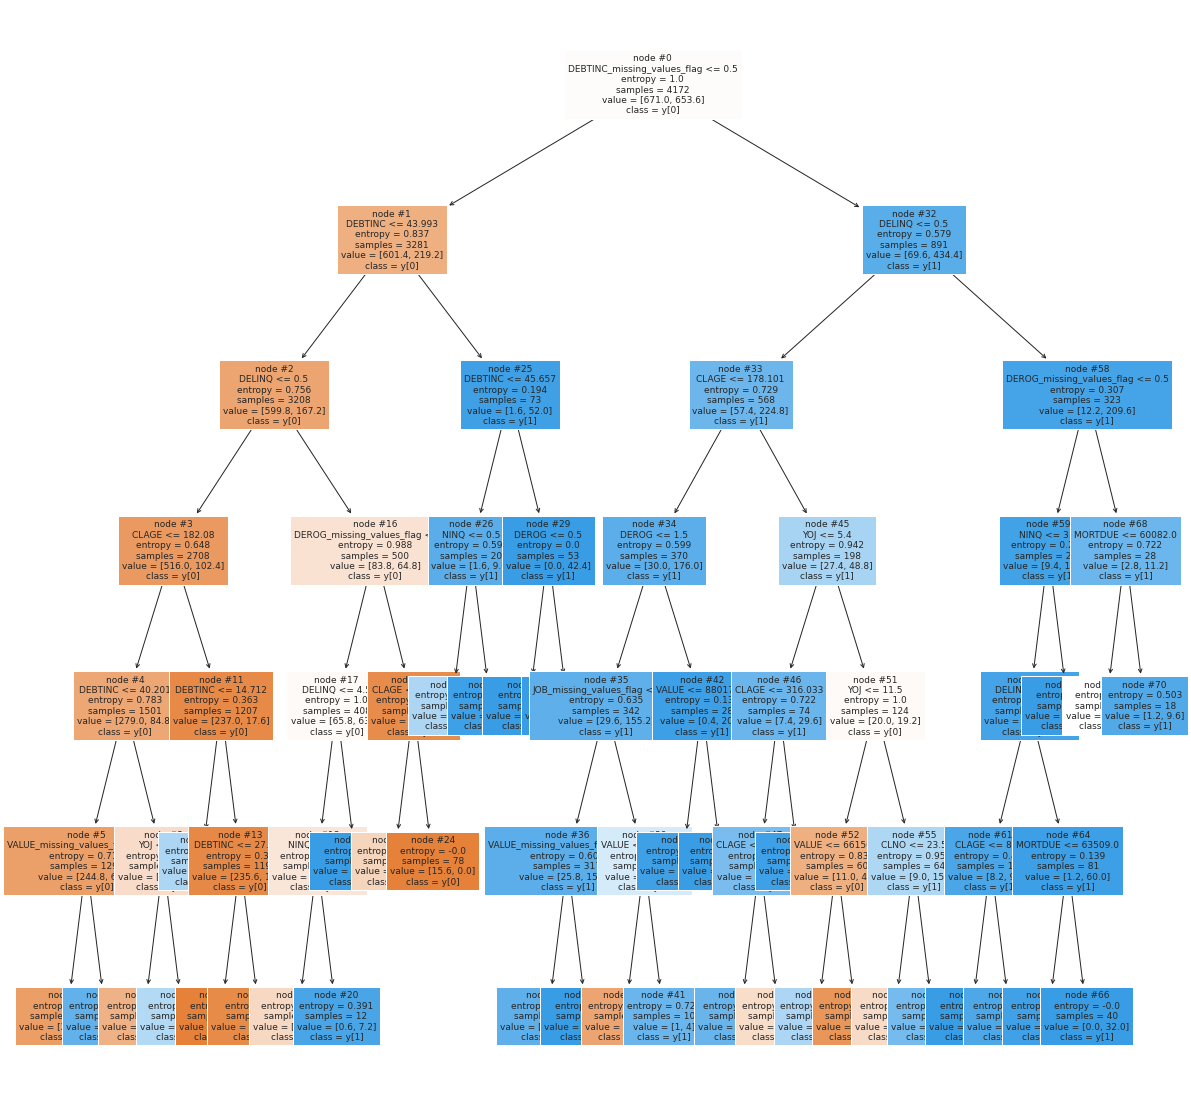

In [ ]:
# Plot the decision  tree and analyze it to build the decision rule

features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [ ]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))
                                                                                                               

                                  Imp
DEBTINC_missing_values_flag  0.541024
DEBTINC                      0.187444
DELINQ                       0.101363
CLAGE                        0.067809
YOJ                          0.022603
DEROG_missing_values_flag    0.019894
NINQ                         0.017815
VALUE_missing_values_flag    0.017194
VALUE                        0.007493
DEROG                        0.005001
JOB_missing_values_flag      0.004568
MORTDUE                      0.004342
CLNO                         0.003450
CLNO_missing_values_flag     0.000000
JOB_ProfExe                  0.000000
JOB_Other                    0.000000
JOB_Office                   0.000000
REASON_HomeImp               0.000000
JOB_Sales                    0.000000
LOAN                         0.000000
NINQ_missing_values_flag     0.000000
CLAGE_missing_values_flag    0.000000
DELINQ_missing_values_flag   0.000000
YOJ_missing_values_flag      0.000000
REASON_missing_values_flag   0.000000
MORTDUE_miss

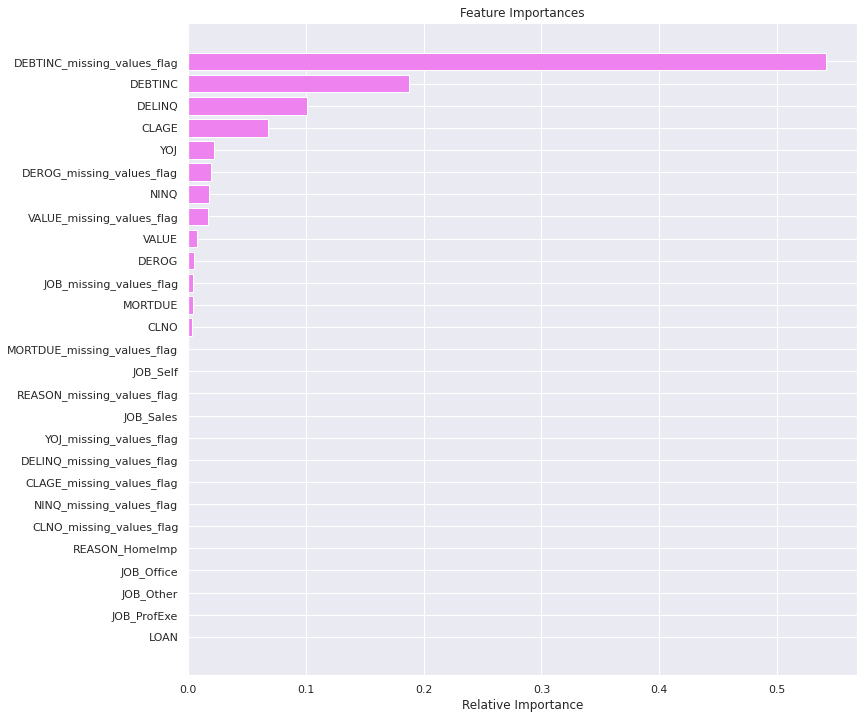

In [ ]:
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down:  
-The first split is DEBTINC_missing_value_flag meaning it is the most important indicator if a loan applicant will default on the loan.  
-DEBTINC ratio, DELINQ number, and CLAGE are important determing factors for loan default prediction. Bank should pay more attention to applicants' information in these aspects.  
-LOAN amount, JOB and YOJ are less relevant in predicting if an borrower may default on the loan. 


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
# Defining Random forest CLassifier

rf_estimator = RandomForestClassifier(random_state=1)

rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



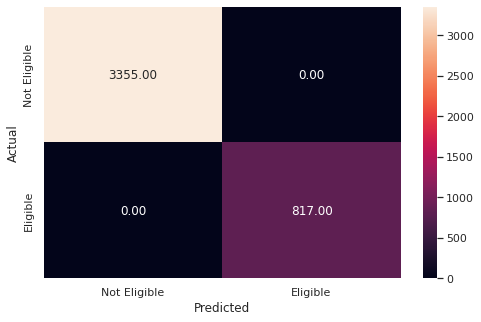

In [ ]:
#Checking performance on the training data

y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1416
           1       0.85      0.72      0.78       372

    accuracy                           0.91      1788
   macro avg       0.89      0.84      0.86      1788
weighted avg       0.91      0.91      0.91      1788



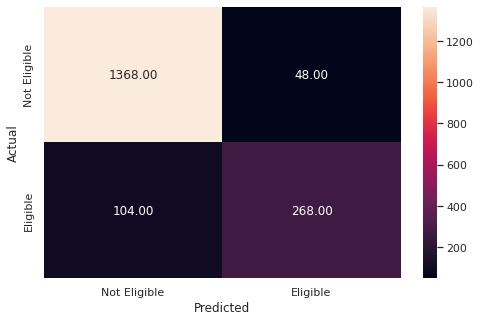

In [ ]:
# Checking performance on the test data

y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_test3)

**Observations:**  
-Compared to tuned decision tree model, random forest performed better in F-1 score (increased from 68% to 78% for class 1); while the recall remained at 72%, the precision has increased 20%.  
-First random forest model seem to have overfitting issue, the model performed really well on training data, but less well in test data.  

### **Build a Random Forest model with Class Weights**

In [ ]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

rf_estimator_cw= RandomForestClassifier(random_state=1, class_weight={0: 0.2, 1: 0.8})

# Fitting Random Forest model

rf_estimator_cw.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



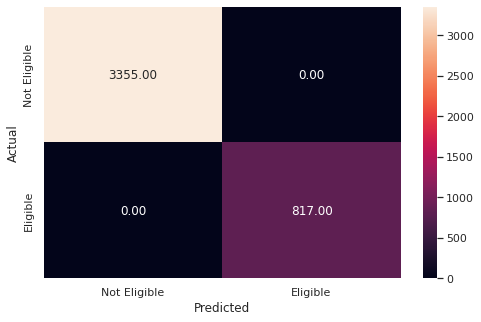

In [ ]:
# Checking performance on the train data

y_pred_train4 = rf_estimator_cw.predict(X_train)

metrics_score(y_train,y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1416
           1       0.86      0.66      0.74       372

    accuracy                           0.91      1788
   macro avg       0.89      0.81      0.84      1788
weighted avg       0.90      0.91      0.90      1788



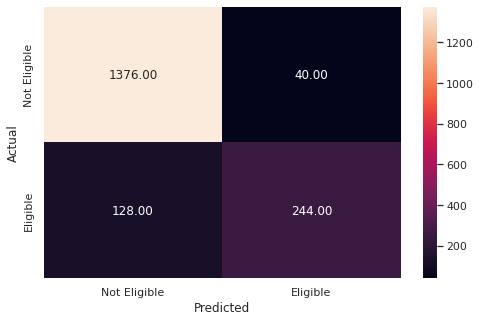

In [ ]:
# Checking performance on the test data

y_pred_test4 = rf_estimator_cw.predict(X_test)

metrics_score(y_test,y_pred_test4)

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1416
           1       0.84      0.71      0.77       372

    accuracy                           0.91      1788
   macro avg       0.88      0.84      0.86      1788
weighted avg       0.91      0.91      0.91      1788



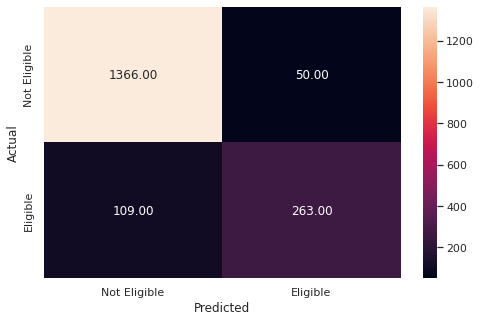

In [ ]:
# applying different weight to the class and testing the performance

rf_estimator_cw1= RandomForestClassifier(random_state=1, class_weight={0: 0.8, 1: 0.2})

rf_estimator_cw1.fit(X_train,y_train)

y_pred_train5 = rf_estimator_cw1.predict(X_train)

y_pred_test5 = rf_estimator_cw1.predict(X_test)

metrics_score(y_test,y_pred_test5)

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [ ]:
# Choose the type of classifier. 

rf_estimator_tuned = RandomForestClassifier(random_state = 1)


# Grid of parameters to choose from

parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "min_samples_leaf": [15,20],
    "max_features": ["auto", "sqrt"],
    "max_samples": [0.9, 1],
    "class_weight" : ["balanced"]
             }

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(f1_score, pos_label = 1)


# Run the grid search

grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)


#fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters

rf_estimator_tuned_base = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

rf_estimator_tuned_base.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7,
                       max_features='auto', max_samples=0.9,
                       min_samples_leaf=15, n_estimators=110, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3355
           1       0.65      0.82      0.72       817

    accuracy                           0.88      4172
   macro avg       0.80      0.86      0.82      4172
weighted avg       0.89      0.88      0.88      4172



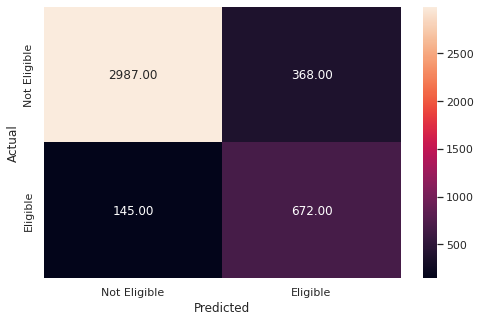

In [ ]:
# Checking performance on the training data

y_pred_train6 = rf_estimator_tuned_base.predict(X_train)

metrics_score(y_train, y_pred_train6)

#### Checking the performance on the test dataset

> Indented block



              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1416
           1       0.65      0.76      0.70       372

    accuracy                           0.87      1788
   macro avg       0.79      0.83      0.81      1788
weighted avg       0.87      0.87      0.87      1788



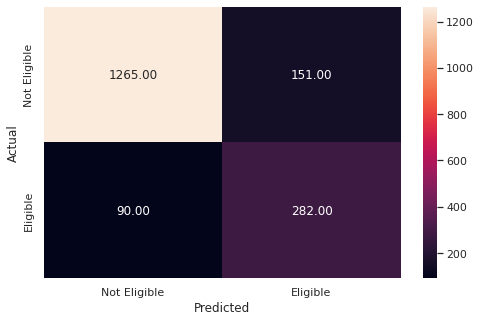

In [ ]:
# Checking performace on test dataset

y_pred_test6 = rf_estimator_tuned_base.predict(X_test)

metrics_score(y_test, y_pred_test6)

**Insights:**  
Tuned random forest performed better than the original random forest. The recall rate increased from 72% to 76%. The precision however has decreased from 85% to 65%.  

#### Plot the Feature importance of the tuned Random Forest

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

print (pd.DataFrame(rf_estimator_tuned_base.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                                  Imp
DEBTINC_missing_values_flag  0.340541
DEBTINC                      0.261960
DELINQ                       0.095567
CLAGE                        0.063813
DEROG                        0.058267
LOAN                         0.028825
VALUE                        0.026842
NINQ                         0.022993
CLNO                         0.021274
MORTDUE                      0.020221
YOJ                          0.017817
VALUE_missing_values_flag    0.012912
DEROG_missing_values_flag    0.007619
JOB_missing_values_flag      0.003147
JOB_Other                    0.002613
JOB_Office                   0.002607
REASON_HomeImp               0.002093
CLAGE_missing_values_flag    0.001863
JOB_ProfExe                  0.001712
DELINQ_missing_values_flag   0.001685
YOJ_missing_values_flag      0.001442
CLNO_missing_values_flag     0.001214
MORTDUE_missing_values_flag  0.000875
NINQ_missing_values_flag     0.000822
JOB_Sales                    0.000706
REASON_missi

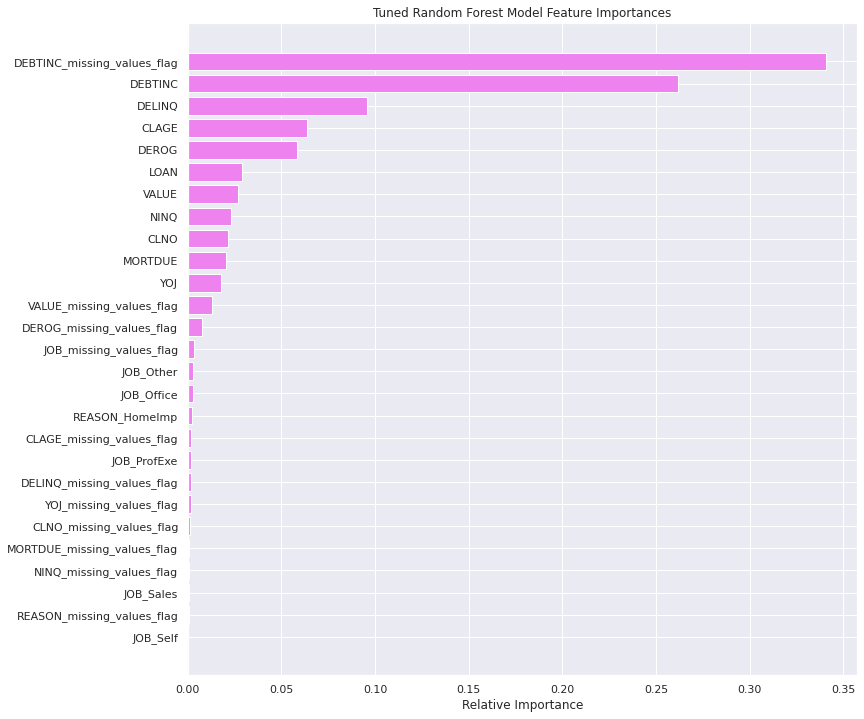

In [ ]:
importances = rf_estimator_tuned_base.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Tuned Random Forest Model Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

In [ ]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1416
           1       0.89      0.73      0.80       372

    accuracy                           0.93      1788
   macro avg       0.91      0.85      0.88      1788
weighted avg       0.92      0.93      0.92      1788



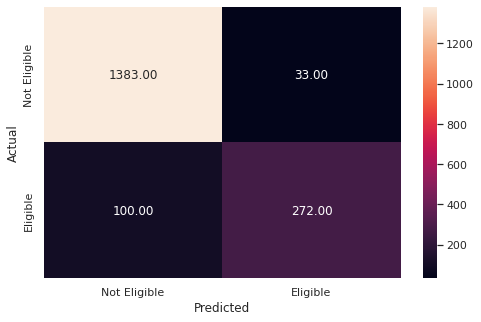

In [ ]:
# XGBoost Regressor
xgb_cl = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb_cl.fit(X_train,y_train)

# Model Performance on the train data

#y_pred_train8 = xgb_cl.predict(X_train)

#metrics_score(y_train, y_pred_train8)

# Model Performance on the test data

y_pred_test8 = xgb_cl.predict(X_test)

metrics_score(y_test, y_pred_test8)

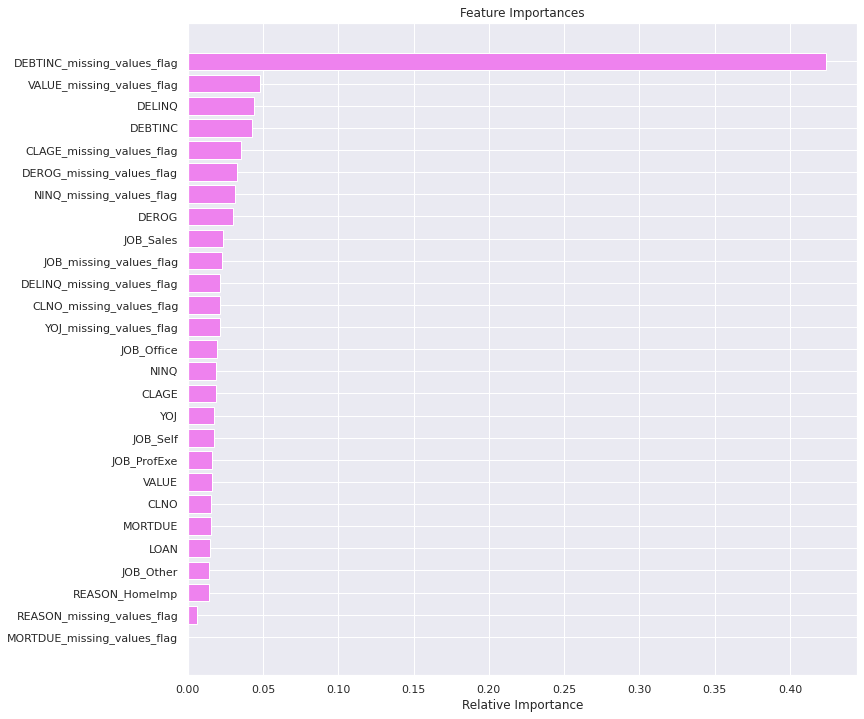

In [ ]:
importances = xgb_cl.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

In [ ]:
# Grid of parameters to choose from

xgb_param = {"n_estimators": [100, 500, 1000],
    "max_depth": [3, 10],
    "min_child_weight": [1,2],
    "learning_rate": [0.1,0.2,0.5],
    "scale_pos_weight": [0,1,5,10],
    "gamma":[0,1,3]
             }

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(f1_score, pos_label = 1)


# Run the grid search

grid_obj = GridSearchCV(xgb_cl, xgb_param, scoring = scorer, cv = 5)


#fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters

xgb_cl_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

xgb_cl_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1416
           1       0.85      0.81      0.83       372

    accuracy                           0.93      1788
   macro avg       0.90      0.89      0.89      1788
weighted avg       0.93      0.93      0.93      1788



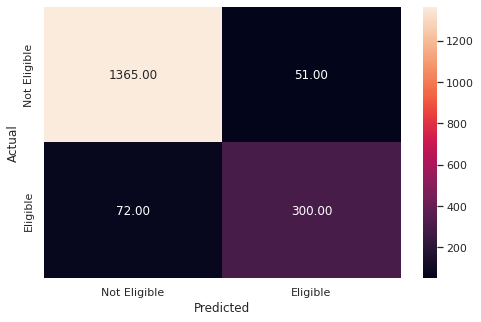

In [ ]:
# Model Performance on the test data

y_pred_test9 = xgb_cl_tuned.predict(X_test)

metrics_score(y_test, y_pred_test9)

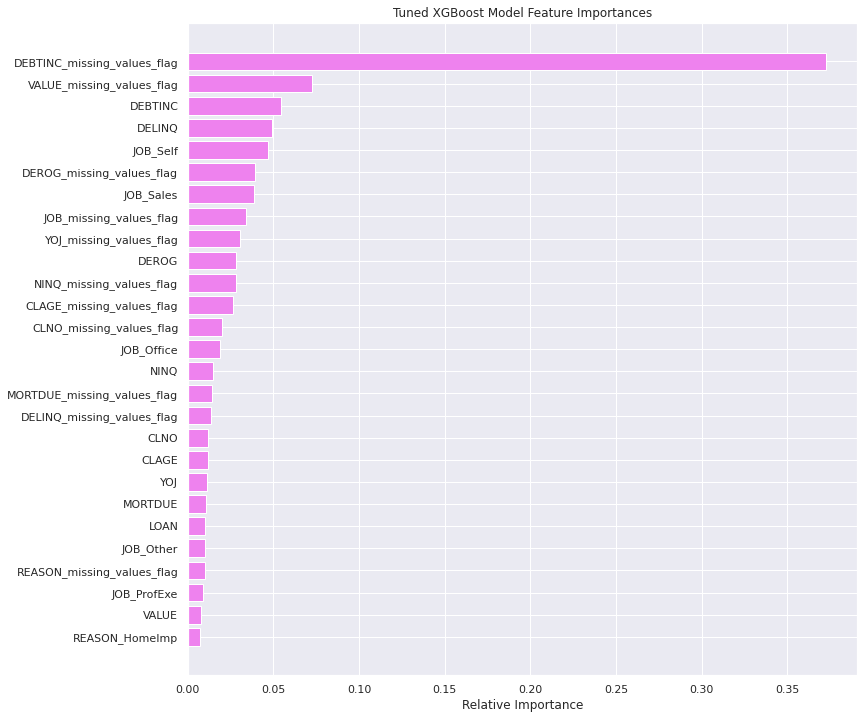

In [ ]:
importances = xgb_cl_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Tuned XGBoost Model Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Comparing Model Performances**

In [ ]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [ ]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [ ]:
# Make the list of all the model names 

models = [d_tree,d_tree_tuned,rf_estimator,rf_estimator_cw,rf_estimator_cw1,rf_estimator_tuned_base,xgb_cl,xgb_cl_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['Decision_tree','Decision_tree_tuned','Random_forest','Random_forest_cw','Random_forest_cw_mod','Tandon_forest_tuned','XGB','XGBtuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0         Decision_tree        1.000000       0.862975      1.000000   
1   Decision_tree_tuned        0.883509       0.866890      0.793146   
2         Random_forest        1.000000       0.914989      1.000000   
3      Random_forest_cw        1.000000       0.906040      1.000000   
4  Random_forest_cw_mod        1.000000       0.911074      1.000000   
5   Tandon_forest_tuned        0.877037       0.865213      0.822521   
6                   XGB        0.998322       0.925615      0.991432   
7              XGBtuned        1.000000       0.931208      1.000000   

   Test_Recall  Train_Precision  Test_Precision  
0     0.623656         1.000000        0.688427  
1     0.723118         0.671503        0.665842  
2     0.720430         1.000000        0.848101  
3     0.655914         1.000000        0.859155  
4     0.706989         1.000000        0.840256  
5     0.758065         0.646154        0.651270  
6     0.731183         1.000000        0.891803  
7     0.806452         1.000000        0.854701

**Insights:**  
Comparing all the models we trained, we can see the tuned XGBoost model had the best performance. However black box model like random forest and XGBoost model lack the interpretability.  

Alternatively we can consider the logistic regression and tuned decision tree model, as they both have high interpretability yet pretty good performance in my model.  

Incorporating SHAP to boost the interpretability of XGBoost model  

In [ ]:
!pip install shap
import shap
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Create SHAP explainer 
explainer = shap.TreeExplainer(xgb_cl_tuned)
# Calculate shapley value of the test data set
shap_values = explainer.shap_values(X_test)

We need to provide specific emplainations to the loan applicants why a specific loan application is approved or denied. We can do so by plotting the individual application shapley value (influences by each variable input)

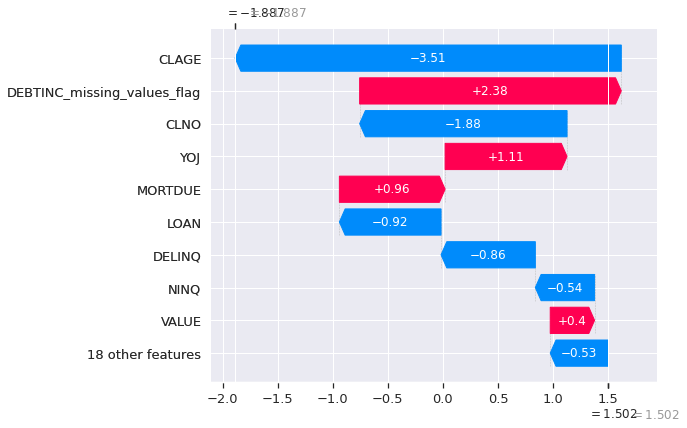

In [ ]:
#plot the feature impact for a random input sample

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[300],feature_names=X_test.columns)

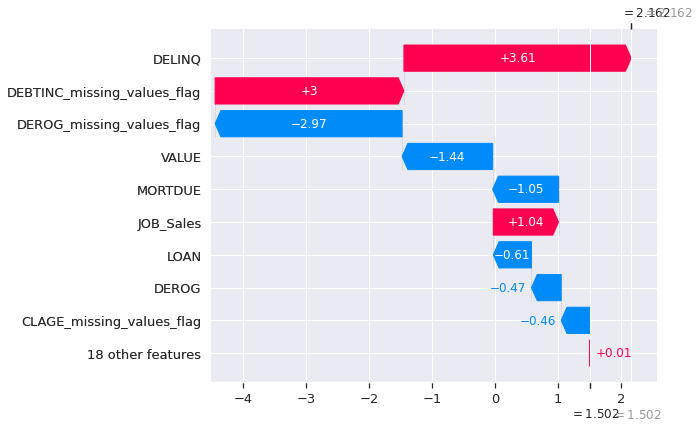

In [ ]:
#plot the feature impact for a random input sample

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[341],feature_names=X_test.columns)

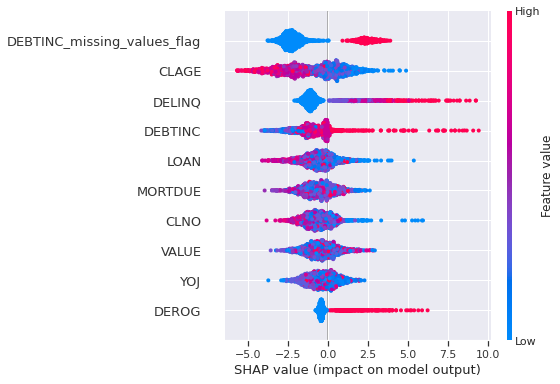

In [ ]:
#plot the summary plot to see the impact of each feature on the model output

shap.summary_plot(shap_values, X_test, max_display = 10)

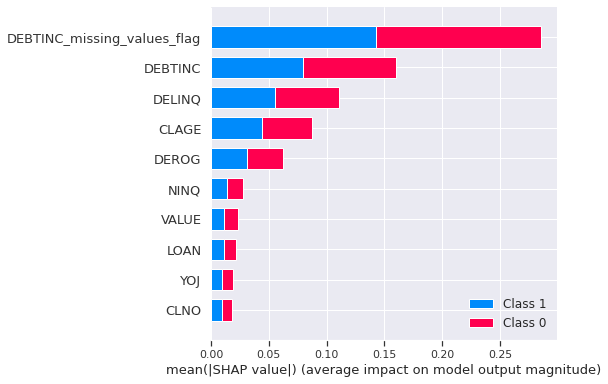

In [ ]:
# Create SHAP explainer for tuned random forest model
explainer = shap.TreeExplainer(rf_estimator_tuned_base)
# Calculate shapley value of the test data set
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, max_display = 10)